In [65]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [66]:
#load data
data = pd.read_csv("../data/housing.csv")

In [67]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Data Visualization

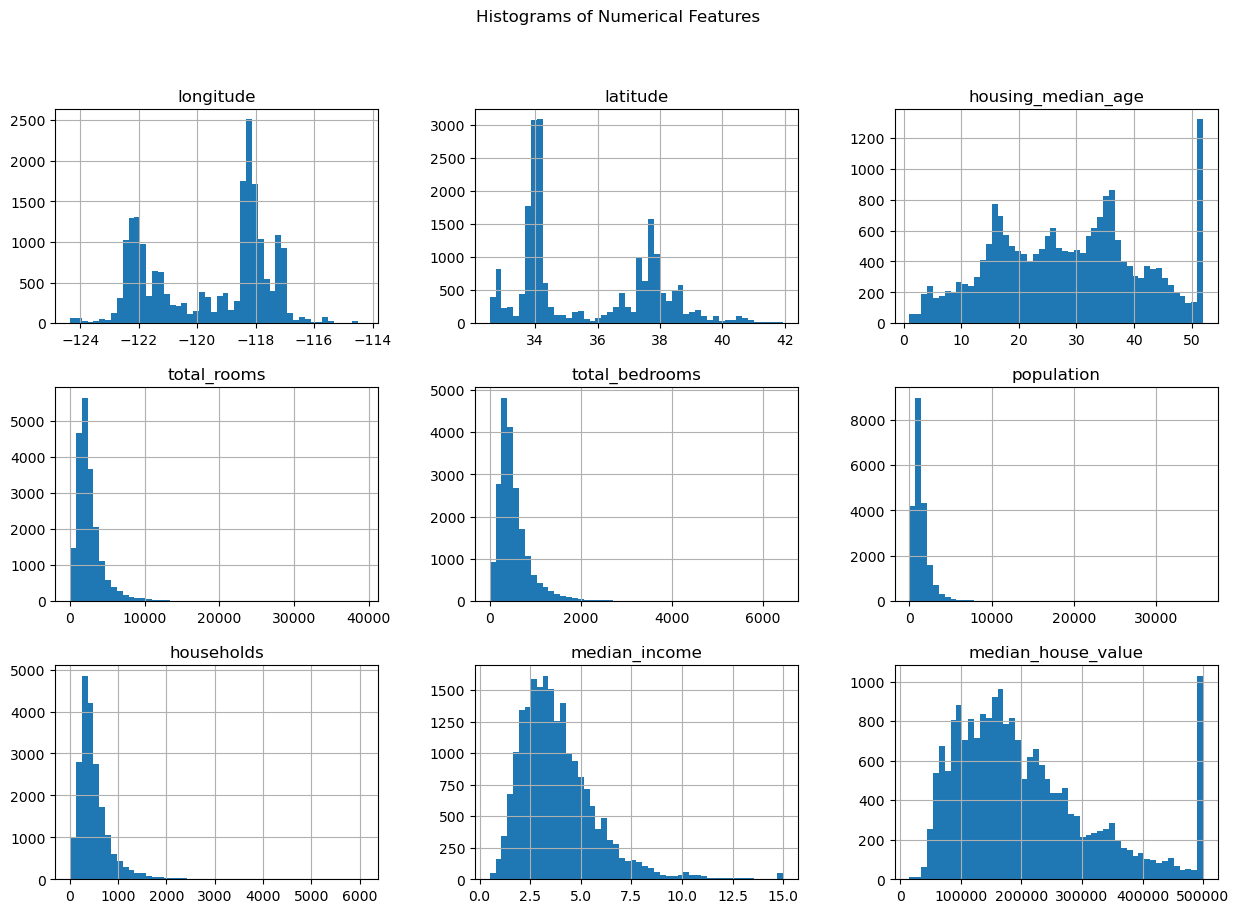

In [68]:
#Histograms for numerical features
data.hist(bins=50, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

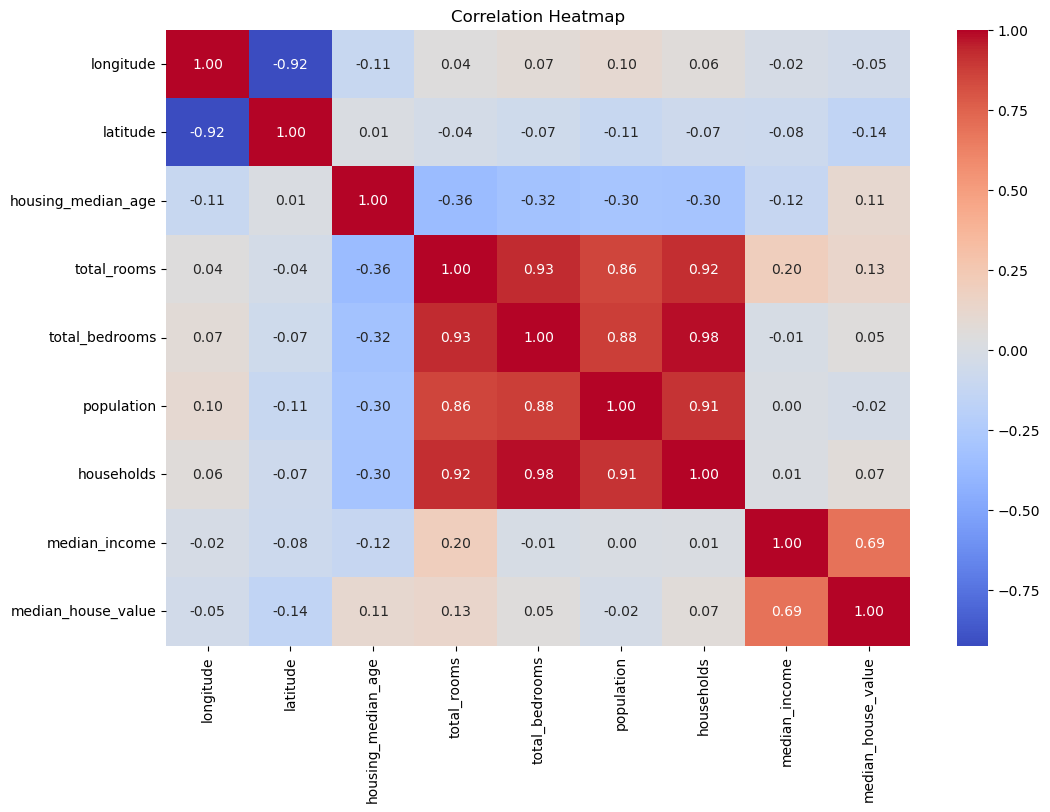

In [69]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

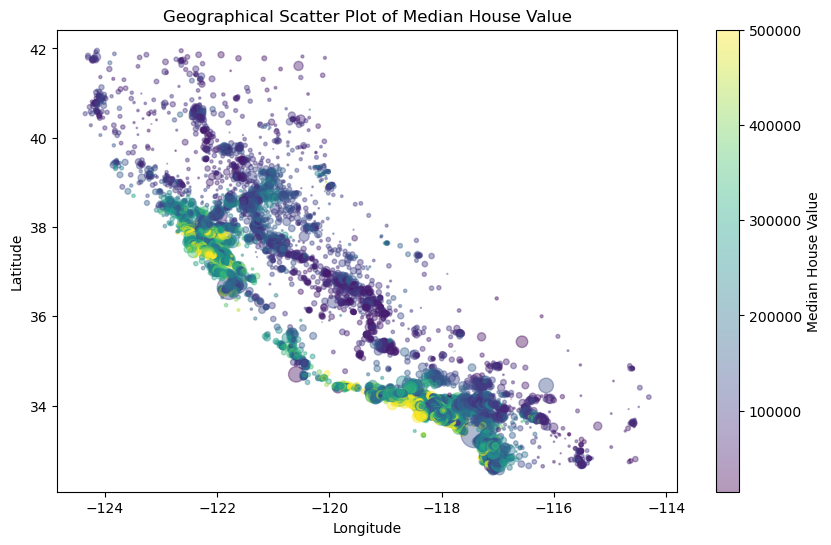

In [70]:
# 3. Geographical Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], alpha=0.4,
            c=data['median_house_value'], cmap='viridis', s=data['population']/100)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Scatter Plot of Median House Value')
plt.show()

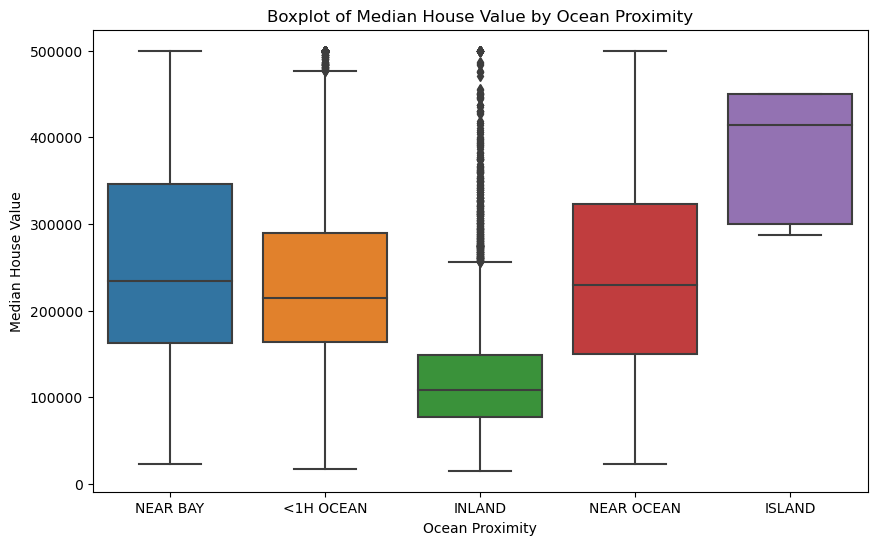

In [71]:
# Boxplot for 'ocean_proximity' vs 'median_house_value'
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title("Boxplot of Median House Value by Ocean Proximity")
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

Data Preprocessing


In [72]:
# Check for missing values
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [73]:
# Handle missing values (if any)
data.fillna(data.median(), inplace=True)

C:\Users\mohamad\AppData\Local\Temp\ipykernel_10824\1070648803.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.median(), inplace=True)


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [75]:
# One-hot encode the 'ocean_proximity' column
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

Feature Engineering

In [76]:
skewed_columns = ['total_rooms', 'total_bedrooms', 'population', 'households']
for col in skewed_columns:
    data[col] = np.log1p(data[col])  # log1p to handle zero values

In [77]:
# 2. Create new features
data['bedroom_ratio'] = data['total_bedrooms'] / data['total_rooms']
data['household_rooms'] = data['total_rooms'] / data['households']

In [78]:
# Feature selection
# We'll use all features except 'median_house_value' (target variable)
features = data.drop(columns=['median_house_value'])
target = data['median_house_value']

In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Mean Squared Error (MSE): 2528249027.2357054
Root Mean Squared Error (RMSE): 50281.69674181357
R^2 Score: 0.8070641250772228


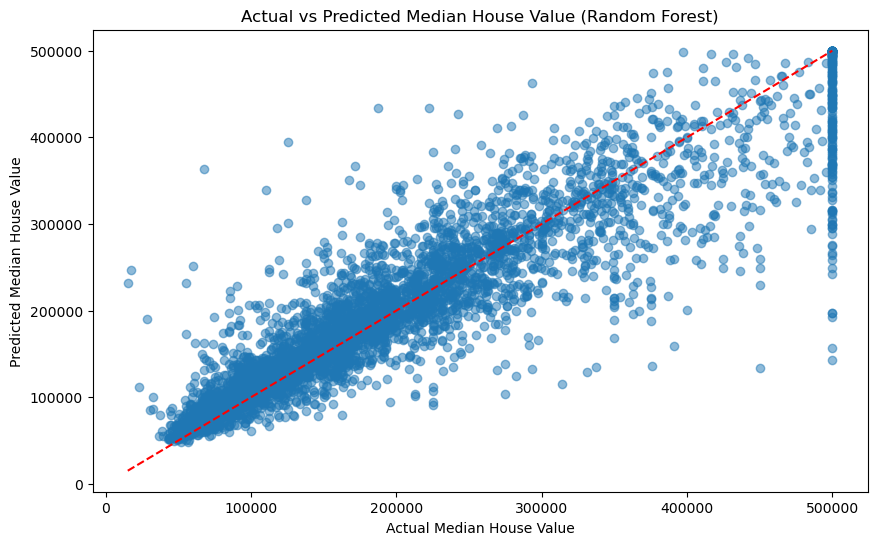

Feature Importances:
                       Feature  Importance
7                median_income    0.488263
8       ocean_proximity_INLAND    0.140889
0                    longitude    0.094666
1                     latitude    0.085328
2           housing_median_age    0.049887
12               bedroom_ratio    0.033344
5                   population    0.027254
13             household_rooms    0.023619
3                  total_rooms    0.019131
4               total_bedrooms    0.014878
6                   households    0.012903
11  ocean_proximity_NEAR OCEAN    0.008820
10    ocean_proximity_NEAR BAY    0.000886
9       ocean_proximity_ISLAND    0.000131


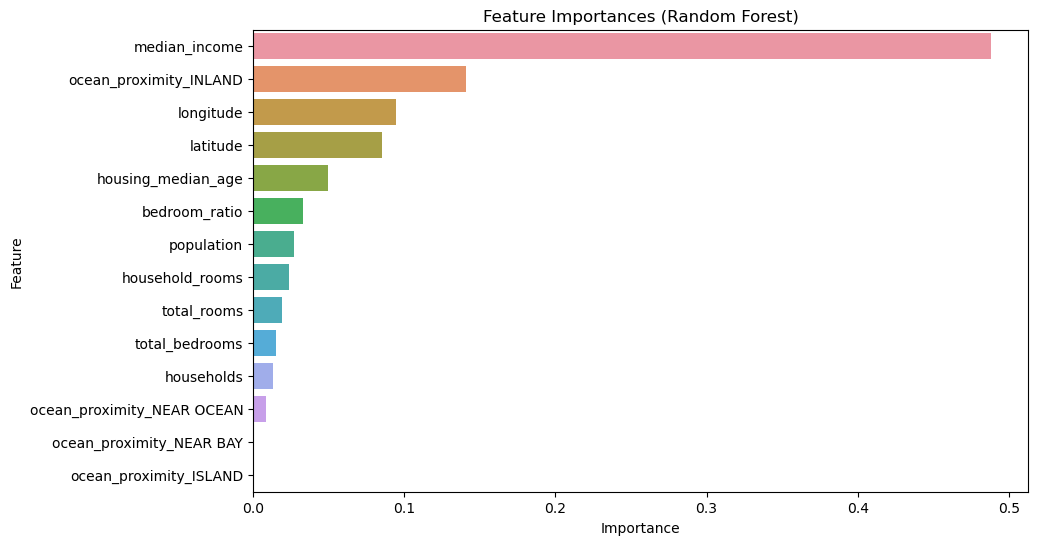

In [80]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Value (Random Forest)')
plt.show()

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances (Random Forest)')
plt.show()
